C:\Users\user\AppData\Roaming\Python\Python313\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\user\AppData\Local\Temp\ipykernel_12880\2016498627.py:30: RuntimeWarning: overflow encountered in square
  cost = (1/(2*n)) * np.sum(error**2)


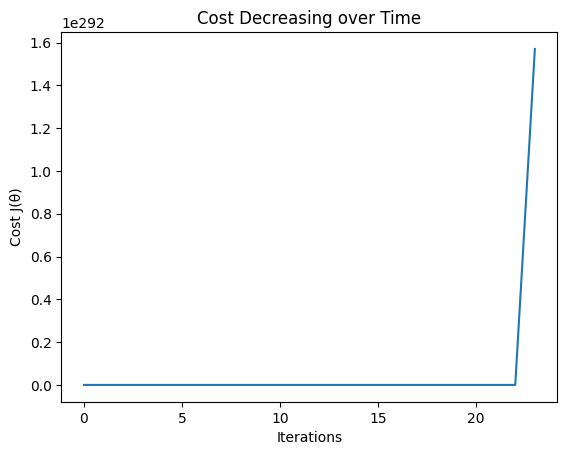

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("./AmesHousing_engineered.csv")

X =df.drop('Log_SalePrice', axis=1)
y = df['Log_SalePrice']

model= LinearRegression()
model.fit(X, y)

theta_0 = model.intercept_
theta_1 = model.coef_



n,d = X.shape
X_b = np.c_[np.ones((n,1)), X] # add x0 = 1 to each instance
learning_rate = 0.1
n_iterations = 1000

theta_scratch = np.random.randn(d+1, 1) 
cost_history = []

for iteration in range(n_iterations):
    predictions =X_b.dot(theta_scratch)
    error = predictions - y.values.reshape(-1,1)
    cost = (1/(2*n)) * np.sum(error**2)
    cost_history.append(cost)
    gradient = (1/n) * X_b.T.dot(error)
    theta_scratch = theta_scratch - learning_rate * gradient


plt.plot(range(n_iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost J(θ)")
plt.title("Cost Decreasing over Time")
plt.show()
